In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Loading Data

Membaca file CSV dari URL dan menampilkannya dalam bentuk DataFrame

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Athallah22/Data/refs/heads/main/video%20games%20sales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Menampilkan informasi ringkas (summary) tentang struktur DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Menampilkan statistik deskriptif dari kolom-kolom numerik dalam DataFrame

In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Melakukan pengecekan missing value

Menampilkan jumlah nilai yang kosong (null/NaN) di setiap kolom pada DataFrame

In [ ]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


Menghitung berapa banyak jumlah data duplikasi

In [ ]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


# EDA


Menampilkan visualiasai dengan diagram batang tentang distribusi tahun rilis

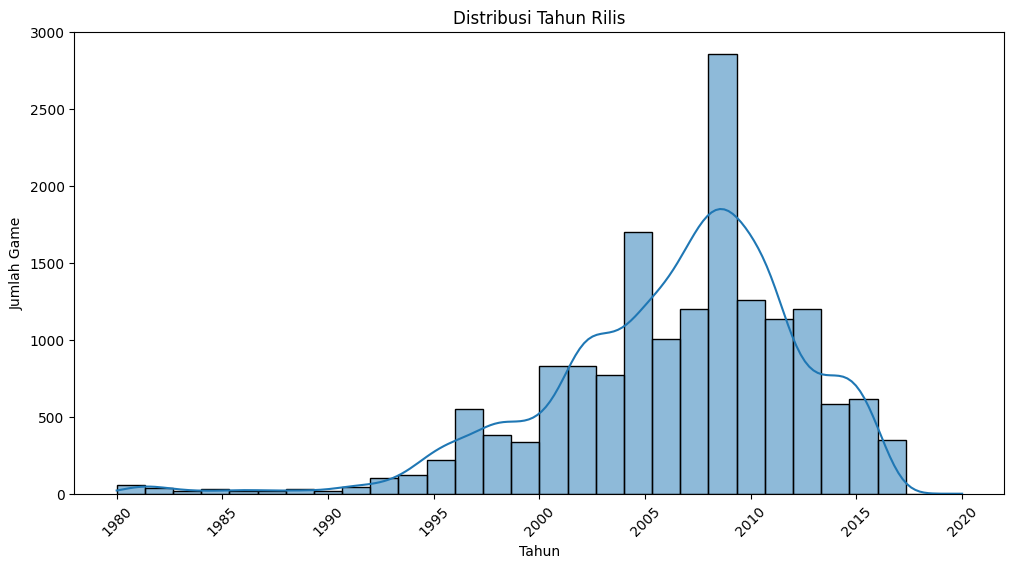

In [ ]:
# Cek distribusi tahun rilis
plt.figure(figsize=(12,6))
sns.histplot(df['Year'], bins=30, kde=True)
plt.title('Distribusi Tahun Rilis')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Game')
plt.xticks(rotation=45)
plt.show()

- **Puncak Rilisan: 2008–2009**
 - Jumlah game tertinggi dirilis, >2800 game.


- **Lonjakan Mulai Tahun 2000**
 - Industri game tumbuh pesat setelah tahun 2000.

- **Penurunan Setelah 2011**
  - Kemungkinaan karena pergeseran ke distribusi digital dan game mobile.

- **Era Awal (1980–1995) Sepi**
  - Masih terbatas oleh teknologi dan pasar.



Menampilkan visualisasi Top 10 Publisher berdasarkan jumlah game yang mereka rilis dalam dataset

<ipython-input-312-f0e6adfb25f1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')


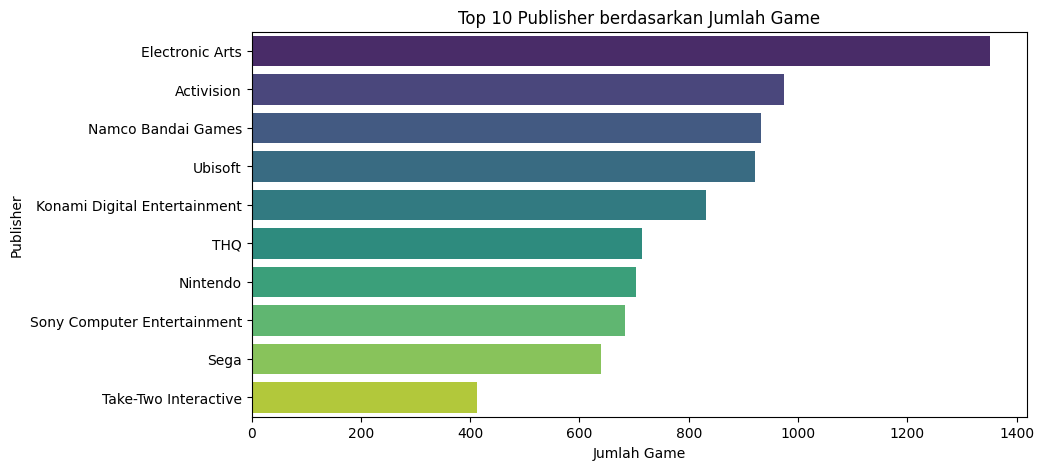

In [ ]:
# Top 10 Publisher berdasarkan jumlah game
top_publishers = df['Publisher'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title('Top 10 Publisher berdasarkan Jumlah Game')
plt.xlabel('Jumlah Game')
plt.ylabel('Publisher')
plt.show()


- Electronic Arts (EA) memimpin dengan jumlah game terbanyak (>1300).
- Activision dan Namco Bandai berada di posisi 2 dan 3, menunjukkan peran besar dalam industri.
- Nintendo meski terkenal, hanya di posisi 7 dalam jumlah game, namun bisa jadi memiliki penjualan per game yang lebih tinggi.
- Mayoritas publisher berasal dari AS dan Jepang, menandakan dominasi dua negara ini di pasar global.

Menampilkan heatmap korelasi antar penjualan regional

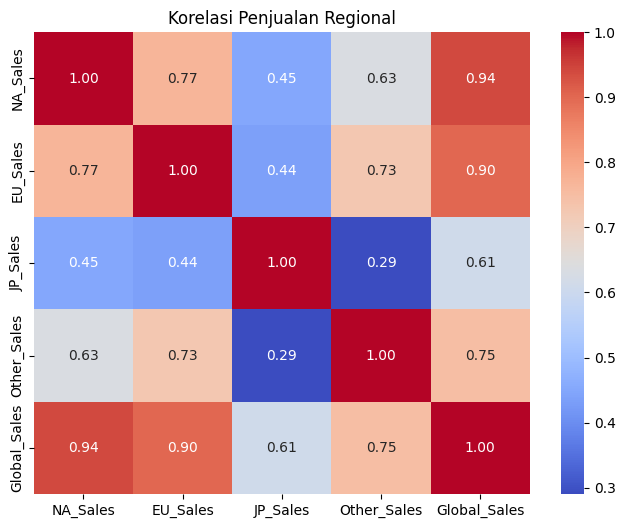

In [ ]:
# Korelasi antar penjualan regional
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
plt.figure(figsize=(8,6))
sns.heatmap(df[sales_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Penjualan Regional')
plt.show()

Menampilkan scatter plot antara NA_Sales dan Global_Sales untuk melihat seberapa besar kontribusi penjualan di Amerika Utara terhadap penjualan global suatu game.

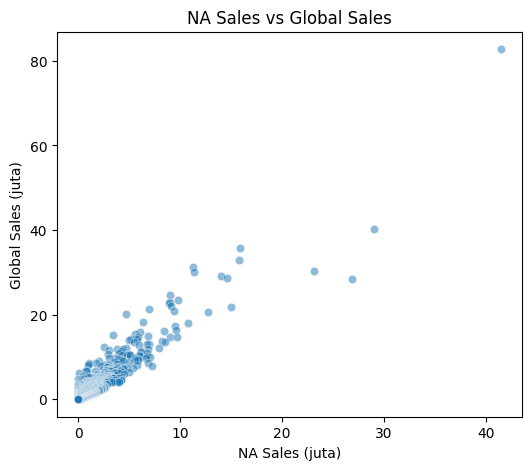

In [ ]:
# Scatter plot NA_Sales vs Global_Sales
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='NA_Sales', y='Global_Sales', alpha=0.5)
plt.title('NA Sales vs Global Sales')
plt.xlabel('NA Sales (juta)')
plt.ylabel('Global Sales (juta)')
plt.show()

Menampilkan boxplot yang membandingkan penjualan global (Global_Sales) berdasarkan genre game (Genre)

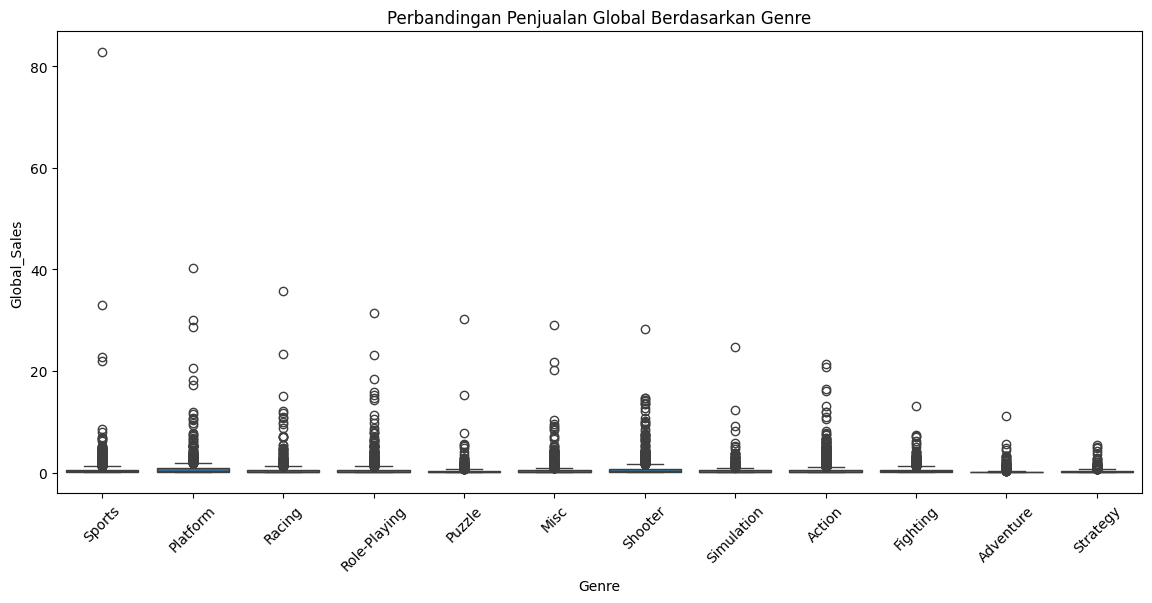

In [ ]:
# Boxplot genre terhadap Global_Sales
plt.figure(figsize=(14,6))
sns.boxplot(x='Genre', y='Global_Sales', data=df)
plt.xticks(rotation=45)
plt.title('Perbandingan Penjualan Global Berdasarkan Genre')
plt.show()

Menampilkan 10 platform game dengan penjualan global tertinggi berdasarkan data Global_Sales

<ipython-input-316-038234593043>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='magma')


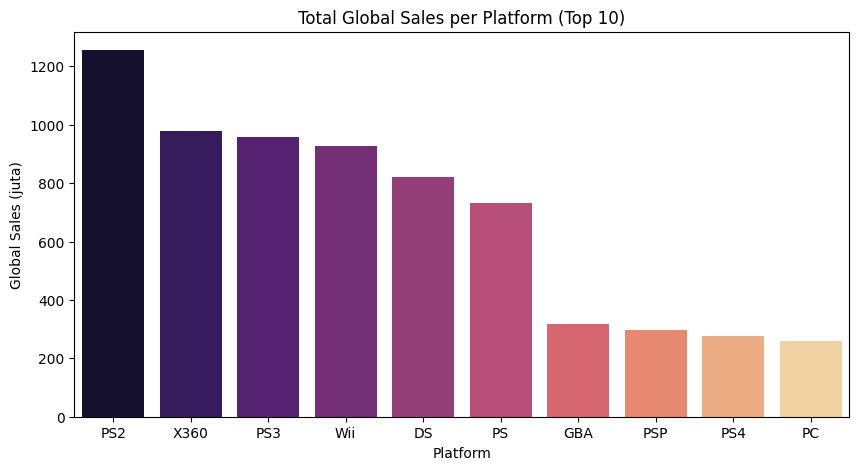

In [ ]:
# Penjualan total per platform (Top 10)
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='magma')
plt.title('Total Global Sales per Platform (Top 10)')
plt.ylabel('Global Sales (juta)')
plt.xlabel('Platform')
plt.show()

###Total Penjualan Global Berdasarkan Platform:
- PS2 (PlayStation 2) – ~1.250 juta unit
Platform dengan penjualan global tertinggi. Dominasi ini didukung oleh katalog game besar dan umur panjang di pasar.
- X360 (Xbox 360) dan PS3 (PlayStation 3) – ~970 juta unit
Saingan ketat dalam generasi yang sama, menunjukkan persaingan antara Microsoft dan Sony sangat kuat di era ini.
- Wii – ~930 juta unit
Konsol Nintendo yang sangat populer dengan gameplay inovatif berbasis gerak.
- DS (Nintendo DS) – ~820 juta unit
Menunjukkan kekuatan handheld Nintendo, banyak judul sukses untuk semua umur.
- PS (PlayStation 1) – ~730 juta unit
Konsol Sony generasi pertama, pondasi kesuksesan PlayStation.
- GBA (Game Boy Advance) dan PSP – ~310 juta unit
Dua platform handheld terpopuler generasi awal 2000-an.
- PS4 – ~290 juta unit
Meskipun lebih modern, PS4 belum mengungguli platform lama dalam totalitas (mungkin karena data belum mencakup keseluruhan siklus hidupnya).
- PC – ~270 juta unit
Menariknya, meski pasar PC besar, kontribusi penjualannya dalam grafik ini relatif kecil. Mungkin karena banyak game PC tidak dijual secara fisik atau terekam dalam data yang sama.



# Data preprocessing & Modeling


Melakukan pembersihan data dari value NAN, dan memastikan semua kolom yang digunakan adalah numerik

In [ ]:
# Hilangkan data NaN
df = df.dropna()

# Pastikan semua kolom numerik
df = df[(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']] >= 0).all(axis=1)]
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Menghapus baris-baris data yang dianggap "aneh" atau noise dalam dataset penjualan game

In [ ]:
# Hapus baris aneh (jika semua sales = 0, Global_Sales juga 0.01 bisa jadi noise)
df = df[(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] > 0).any(axis=1)]
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Mendefinisikan fitur (input) dan target (output) dalam sebuah masalah pembelajaran mesin (machine learning) dari dataset

In [ ]:
# Definisikan fitur dan target
X = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = df['Global_Sales']

Membagi data jadi training (80%) dan testing (20%) dengan train_test_split. Setelah itu, fitur distandarisasi supaya tiap kolom punya rata-rata 0 dan standar deviasi 1 menggunakan StandardScaler.

In [ ]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur (opsional, tapi bagus untuk model linier)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Kode ini membuat sebuah dictionary models yang berisi tiga model regresi yang akan digunakan untuk pelatihan dan prediksi:

- "Linear Regression": model regresi linear dasar.
- "Random Forest": model ensemble dengan 100 pohon keputusan.
- "Support Vector Regressor": model SVR untuk regresi non-linear.

In [ ]:
# Inisialisasi Model
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR()
}

Melatih tiap model, melakukan prediksi pada data testing, lalu menghitung dan menampilkan nilai MSE dan R² untuk mengukur performa setiap model. Hasil dan prediksi disimpan di results.

Menghitung metrik evaluasi:
- Mean Squared Error (MSE): ukuran rata-rata kuadrat kesalahan prediksi.
- R² Score: ukuran seberapa baik model menjelaskan variansi data (semakin dekat ke 1, semakin bagus).

In [ ]:
# Evaluasi dan Prediksi
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        "model": model,
        "mse": mse,
        "r2": r2,
        "y_pred": y_pred
    }
    print(f"📊 {name}")
    print(f" - Mean Squared Error: {mse:.4f}")
    print(f" - R² Score: {r2:.4f}")
    print()

📊 Linear Regression
 - Mean Squared Error: 0.0000
 - R² Score: 1.0000

📊 Random Forest
 - Mean Squared Error: 0.7105
 - R² Score: 0.8340

📊 Support Vector Regressor
 - Mean Squared Error: 2.4955
 - R² Score: 0.4170



###**Hasil evaluasi model menunjukkan:**

- Linear Regression:
  - MSE = 0.0000 (sangat kecil, hampir tanpa error)
  - R² = 1.0000 (model menjelaskan 100% variansi data)

→ Model ini sangat cocok atau mungkin terjadi overfitting (prediksi sangat presisi pada data test).

- Random Forest:
  - MSE = 0.7105 (error relatif kecil)
  - R² = 0.8340 (model menjelaskan sekitar 83.4% variansi)

→ Model ini cukup baik dan robust, mampu menangkap pola non-linear.

- Support Vector Regressor:
  - MSE = 2.4955 (error lebih besar)
  - R² = 0.4170 (model hanya menjelaskan 41.7% variansi)

→ Model ini kurang cocok atau butuh tuning parameter agar hasilnya lebih baik.

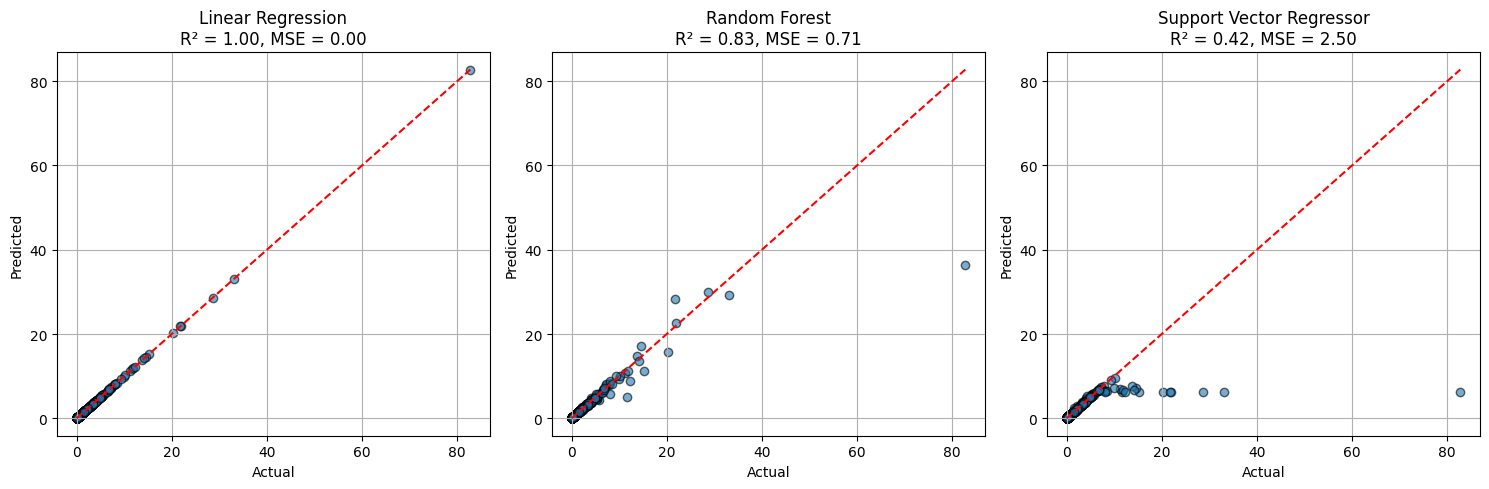

In [ ]:
# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(15, 5))

for i, (name, res) in enumerate(results.items()):
    plt.subplot(1, 3, i+1)
    plt.scatter(y_test, res["y_pred"], alpha=0.6, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name}\nR² = {res['r2']:.2f}, MSE = {res['mse']:.2f}")
    plt.grid(True)

plt.tight_layout()
plt.show()

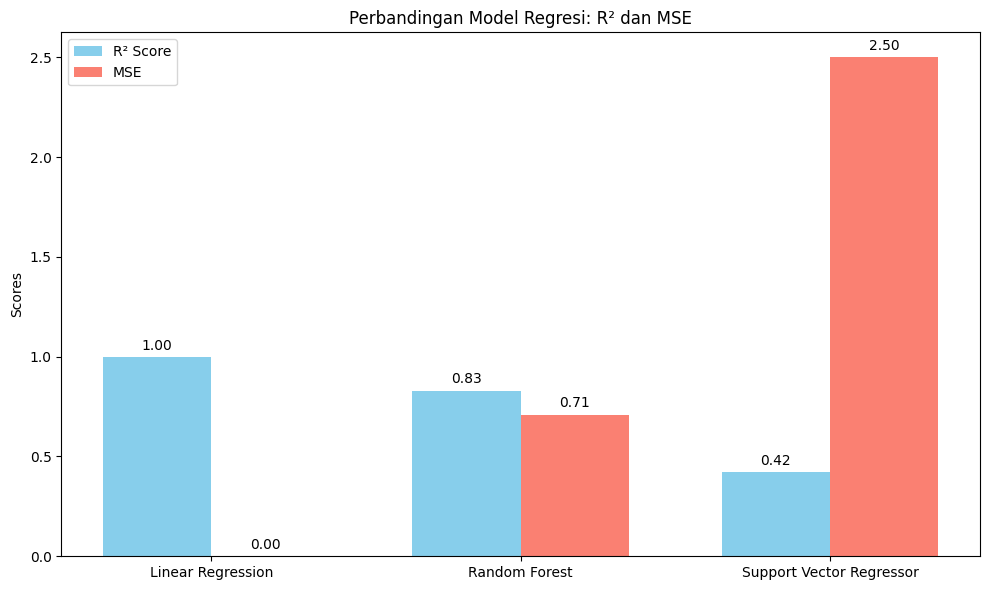

In [ ]:
# Nilai evaluasi dari masing-masing model
models = ['Linear Regression', 'Random Forest', 'Support Vector Regressor']
r2_scores = [1.00, 0.83, 0.42]
mses = [0.00, 0.71, 2.50]

x = np.arange(len(models))  # Label lokasi
width = 0.35  # Lebar batang

# Buat subplot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart untuk R² dan MSE
bars1 = ax1.bar(x - width/2, r2_scores, width, label='R² Score', color='skyblue')
bars2 = ax1.bar(x + width/2, mses, width, label='MSE', color='salmon')

# Label dan format
ax1.set_ylabel('Scores')
ax1.set_title('Perbandingan Model Regresi: R² dan MSE')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()

# Tambahkan nilai di atas batang
for bar in bars1 + bars2:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # offset vertikal
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


### KESIMPULAAN

1. Linear Regression
  - R² = 1.00, MSE = 0.00
  - Titik-titik data hampir sempurna berada di garis merah (garis ideal antara prediksi dan aktual), menunjukkan bahwa model memprediksi data dengan sangat akurat.
  - Namun, nilai R² = 1.00 dan MSE = 0.00 hampir terlalu sempurna — ini bisa jadi tanda overfitting atau data yang terlalu sederhana.

2. Random Forest
  - R² = 0.83, MSE = 0.71
  - Titik-titik cukup dekat dengan garis ideal, tapi ada penyebaran lebih besar dibanding linear regression.
  - Masih merupakan model yang baik, namun tidak seakurat Linear Regression dalam konteks ini.

3. Support Vector Regressor (SVR)
  - R² = 0.42, MSE = 2.50
  - Titik-titik prediksi tersebar lebih jauh dari garis merah, terutama pada nilai aktual yang tinggi.
  - SVR tampaknya mengalami underfitting, terutama untuk data dengan nilai tinggi — kemungkinan karena parameter SVR yang belum optimal (seperti C, epsilon, dan kernel).